In [327]:
from __future__ import division

#import tabular as tb
import pandas as pd
import numpy as np
import matplotlib.mlab as ml
import matplotlib.pyplot as pp

from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.interpolate import Rbf
from pylab import imread, imshow

In [902]:
#layout = imread('input/floorplan.png')
layout = imread('input/floorplan.png')
# note that the floorplan is semi-transparent, if yours has a solid background, make sure to overlay the RSSI over the floorplan, by playing with the zorder below

#a = tb.tabarray(SVfile='input/mapping.csv')
a = pd.read_csv('input/input.csv')

#APs = ['2e:20', 'f6:70', '5b:30', '74:c0', 'f5:90', '16:a0','14:a1', 'f6:71', '5b:31', '74:c1', 'f5:91', '16:a1']
# see if thsi works
APs = list(a.columns[3:]) #[3:-1] if you want to exclude the last one, cellular

In [903]:
layout.shape

(1549, 2805, 4)

In [904]:
grid_width = 3100
grid_height = 2300

# this is your image size. You can check it, after the imread function above, by running layout.shape -> you will get the second then first number
image_width = 2805
image_height = 1549

num_x = int(image_width / 4)
num_y = int(num_x / (image_width / image_height))

print ("Resolution: %0.2f x %0.2f" % (num_x, num_y))

Resolution: 701.00 x 387.00


In [905]:
x = np.linspace(0, grid_width, int(num_x))
y = np.linspace(0, grid_height, int(num_y))

gx, gy = np.meshgrid(x, y)
gx, gy = gx.flatten(), gy.flatten()

levels = [-85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25]

interpolate = True

In [906]:
def add_inner_title(ax, title, loc, size=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke

    if size is None:
        size = dict(size=pp.rcParams['legend.fontsize'])

    at = AnchoredText(title, loc=loc, prop=size,
                      pad=0., borderpad=0.5,
                      frameon=False, **kwargs)

    at.set_zorder(200)

    ax.add_artist(at)

    at.txt._text.set_path_effects([withStroke(foreground="w", linewidth=3)])

    return at

In [907]:
def grid_plots():
    f = pp.figure(figsize=(20,20))

    f.suptitle("Individual AP RSSI")

    # Adjust the margins and padding
    f.subplots_adjust(hspace=0.1, wspace=0.1, left=0.05, right=0.95, top=0.85,
            bottom=0.15)

    # Create a grid of subplots using the AxesGrid helper
    image_grid = AxesGrid(f, 111, nrows_ncols=(3, 2), axes_pad=0.1,
            label_mode="1", share_all=True, cbar_location="right",
            cbar_mode="single", cbar_size="3%")

    for beacon, i in zip(APs, range(len(APs))): #reaplaced xrange with range
        # Hide the axis labels
        image_grid[i].xaxis.set_visible(True)
        image_grid[i].yaxis.set_visible(True)

        if interpolate:
            # Interpolate the data
            rbf = Rbf(a['X'], a['Y'], a[beacon],
                    function='linear')

            z = rbf(gx, gy)
            z = z.reshape((num_y, num_x))

            # Render the interpolated data to the plot
            image = image_grid[i].imshow(z, vmin=-85, vmax=-25, extent=(0,
                image_width, image_height, 0), cmap='RdYlBu_r', alpha=1)

            #c = image_grid[i].contourf(z, levels, alpha=0.5)
            #c = image_grid[i].contour(z, levels, linewidths=5, alpha=0.5)
        else:
            z = ml.griddata(a['X'], a['Y'], a[beacon], x, y)

            c = image_grid[i].contourf(x, y, z, levels, alpha=0.5)

        image_grid[i].imshow(layout, interpolation='bicubic', zorder=100)

    # Setup the data for the colorbar and its ticks
    image_grid.cbar_axes[0].colorbar(image)
    image_grid.cbar_axes[0].set_yticks(levels)

    # Add inset titles to each subplot
    for ax, im_title in zip(image_grid, APs):
        t = add_inner_title(ax, "%s" % im_title, loc=3)

        t.patch.set_alpha(0.5)

    pp.show()

/var/folders/f4/sswmwmgd3bl8rxfdhchzt6h00000gn/T/ipykernel_65374/3451403066.py:43: UserWarning: Use the colorbar set_ticks() method instead.
  image_grid.cbar_axes[0].set_yticks(levels)


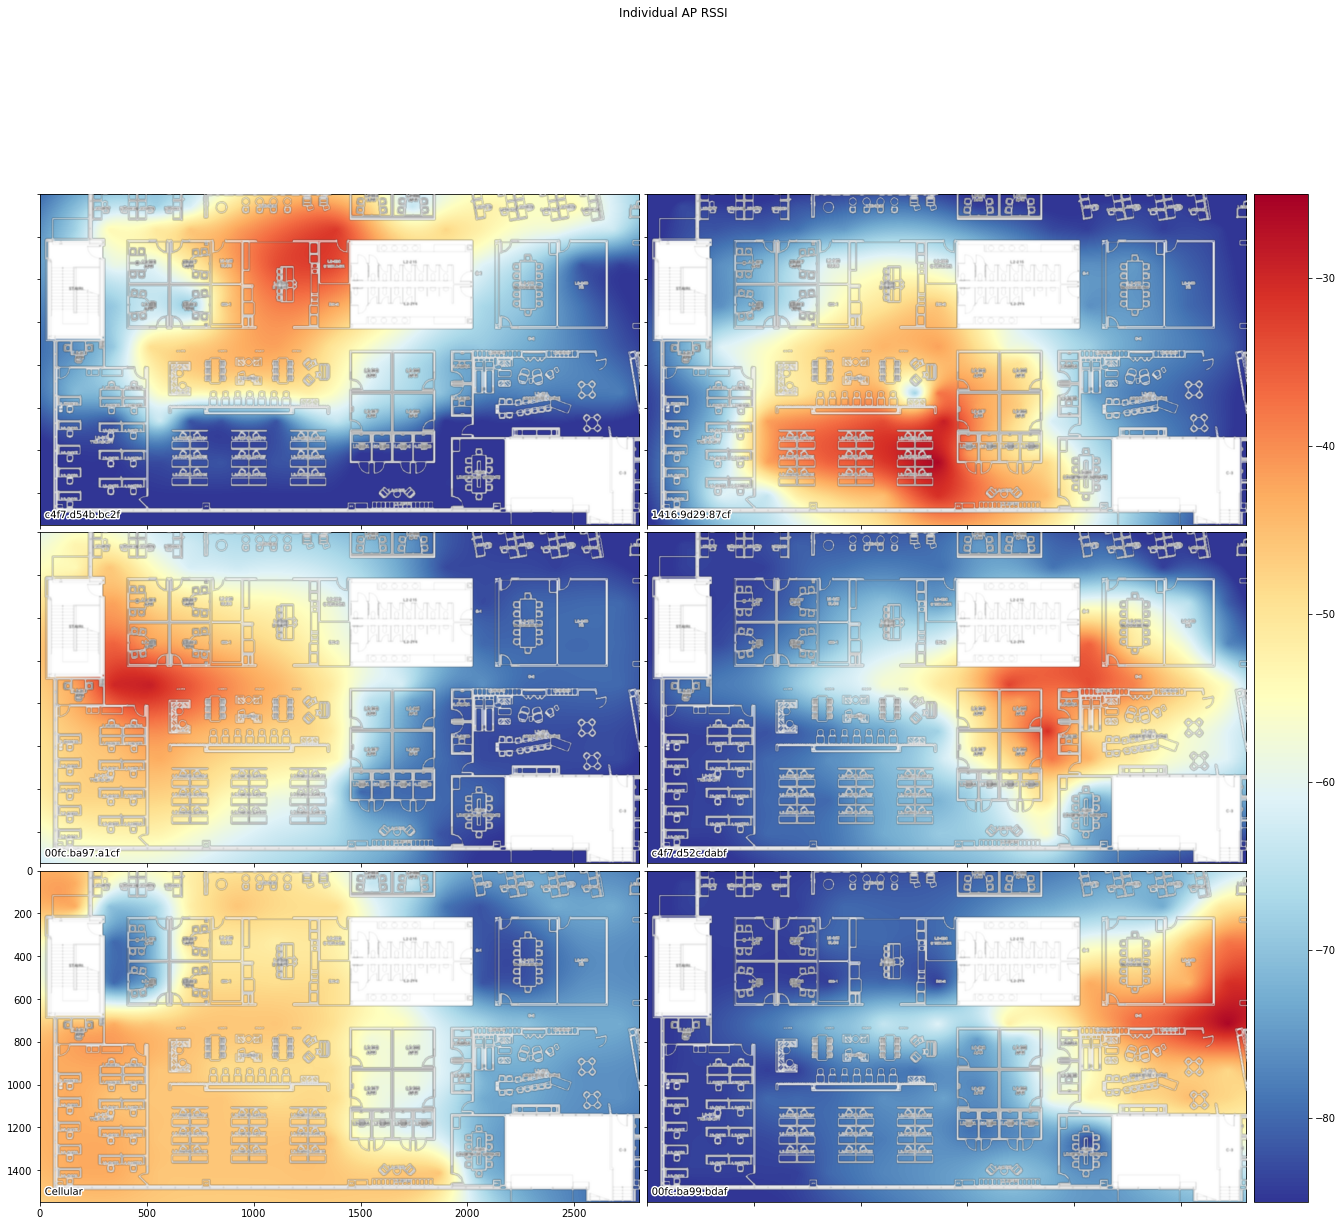

In [908]:
if __name__ == "__main__":
    grid_plots()



In [19]:
len(APs)

4